## Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

In [26]:
plants = pd.read_csv('data/houseplants.csv')

In [27]:
plants.head()

,subreddit,title,selftext
0,houseplants,"Not a fan of any Calathea, but this 'Shine Sta...",NaN
1,houseplants,My new marble queen pothos! Welcome to the fam...,NaN
2,houseplants,Moisture meter says it's @ 9. Got it from Cost...,NaN
3,houseplants,Made a couple of trellises today!,NaN
4,houseplants,Made a couple of trellises tonight!,[deleted]


In [28]:
# checking for nulls
plants.isnull().sum()

subreddit       0
title           0
selftext     4310
dtype: int64

## We will Fill Empty Values with None 

In [29]:
plants.fillna('None', inplace=True)

In [30]:
plants.isnull().sum()

subreddit    0
title        0
selftext     0
dtype: int64

In [31]:
plants['title'].nunique()

4921

In [32]:
plants.shape

(5098, 3)

In [33]:
# we need to drop duplicates i 
plants.drop_duplicates(subset=['title'], inplace=True, ignore_index=True)

In [34]:
plants['title'].sort_values()

1054                                   "A happy accident"
1053                        "A happy unexpected accident"
1052                        "A happy unexpected surprise"
4090                           "I'm just going to look" 😅
541     "Mini-plant 1,95" Yeah thanks for the informat...
                              ...                        
2077                                                    💀
1702                                                    💚
165                                                    💚🌱
1466                                                    💜
302                                                     😱
Name: title, Length: 4921, dtype: object

In [35]:
plants.shape

(4921, 3)

In [36]:
# Now we will check the length of post with less than 5 
plants[plants['title'].str.len() < 30]

,subreddit,title,selftext
10,houseplants,Spider mites SOS question:,How far will they spread? How much do I need t...
16,houseplants,new behbeh,None
27,houseplants,Sharing my favorite plant!,None
32,houseplants,What are these?,None
33,houseplants,Found at Walmart 🥺,None
...,...,...,...
4912,houseplants,Which syngonium is this?,None
4913,houseplants,Repotting Plants,"Hi,\n\nNew plant mama here...What type of cont..."
4915,houseplants,June 2020 vs. Today,None
4918,houseplants,Looking glass begonia!,None


In [60]:
plants['title_word_count'] = plants['title'].map(lambda x: len(x.split(' ')))

In [61]:
plants.columns

Index(['subreddit', 'title', 'selftext', 'title_word_count'], dtype='object')

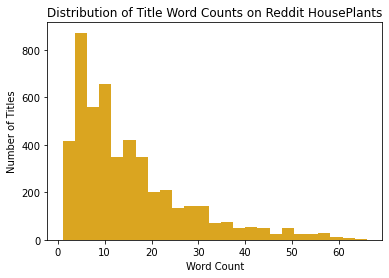

In [18]:
plt.hist(plants['title_word_count'], bins = 25, color = 'goldenrod')
plt.title('Distribution of Title Word Counts on Reddit HousePlants')
plt.xlabel('Word Count')
plt.ylabel('Number of Titles');

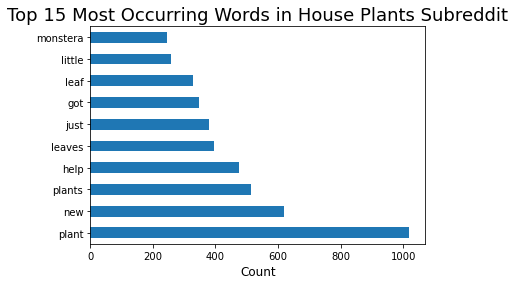

In [45]:
cvec = CountVectorizer(stop_words = 'english')
X = plants['title']
cvec.fit(X)
X_trans = cvec.transform(X)

X_df = pd.DataFrame(X_trans.toarray(), 
                           columns=cvec.get_feature_names())

#Observe the top 15 occurring words
plt.title('Top 15 Most Occurring Words in House Plants Subreddit', size=18)
plt.xlabel('Count', size=12)
X_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [ ]:
cvec = CountVectorizer(stop_words='english', min_df=2)

## Interior Design Reddit

In [20]:
df_id = pd.read_csv('data/interior_design.csv')

In [21]:
df_id.head()

,subreddit,title,selftext
0,InteriorDesign,Marks on newly painted dark wall,NaN
1,InteriorDesign,"Coral Castle Hallway. Travertine floor, Coral ...",NaN
2,InteriorDesign,UK-Based Interior Spray Painter,[removed]
3,InteriorDesign,Does anyone know where to get a decent modular...,[removed]
4,InteriorDesign,Which size rug should i go with for my living ...,NaN


In [22]:
df_id.isnull().sum()

subreddit       0
title           0
selftext     3210
dtype: int64

In [23]:
df_id.shape

(5070, 3)

In [24]:
df_id.fillna('None', inplace=True)

In [25]:
df_id.head()

,subreddit,title,selftext
0,InteriorDesign,Marks on newly painted dark wall,None
1,InteriorDesign,"Coral Castle Hallway. Travertine floor, Coral ...",None
2,InteriorDesign,UK-Based Interior Spray Painter,[removed]
3,InteriorDesign,Does anyone know where to get a decent modular...,[removed]
4,InteriorDesign,Which size rug should i go with for my living ...,None


In [37]:
df_id.nunique()

subreddit       1
title        4918
selftext       97
dtype: int64

In [38]:
# we need to drop duplicates
df_id.drop_duplicates(subset=['title'], inplace=True, ignore_index=True)

In [39]:
df_id.shape

(4918, 3)

In [40]:
df_id.nunique()

subreddit       1
title        4918
selftext       96
dtype: int64

In [41]:
df_id['title_word_count'] = df_id['title'].map(lambda x: len(x.split(' ')))

In [42]:
df_id.head()

,subreddit,title,selftext,title_word_count
0,InteriorDesign,Marks on newly painted dark wall,None,6
1,InteriorDesign,"Coral Castle Hallway. Travertine floor, Coral ...",None,23
2,InteriorDesign,UK-Based Interior Spray Painter,[removed],4
3,InteriorDesign,Does anyone know where to get a decent modular...,[removed],20
4,InteriorDesign,Which size rug should i go with for my living ...,None,14


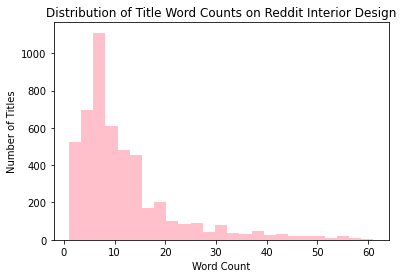

In [43]:
plt.hist(df_id['title_word_count'], bins = 25, color = 'pink')
plt.title('Distribution of Title Word Counts on Reddit Interior Design')
plt.xlabel('Word Count')
plt.ylabel('Number of Titles');

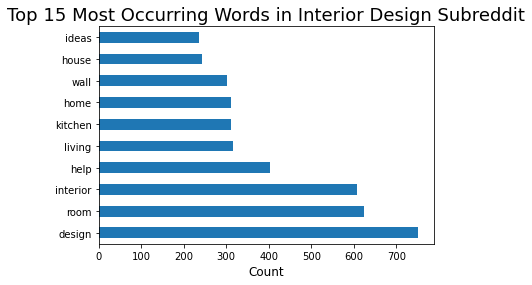

In [47]:
cvec = CountVectorizer(stop_words = 'english')
X = df_id['title']
cvec.fit(X)
X_trans = cvec.transform(X)

X_df = pd.DataFrame(X_trans.toarray(), 
                           columns=cvec.get_feature_names())

#Observe the top 15 occurring words
plt.title('Top 15 Most Occurring Words in Interior Design Subreddit', size=18)
plt.xlabel('Count', size=12)
X_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [48]:
df_id.head()

,subreddit,title,selftext,title_word_count
0,InteriorDesign,Marks on newly painted dark wall,None,6
1,InteriorDesign,"Coral Castle Hallway. Travertine floor, Coral ...",None,23
2,InteriorDesign,UK-Based Interior Spray Painter,[removed],4
3,InteriorDesign,Does anyone know where to get a decent modular...,[removed],20
4,InteriorDesign,Which size rug should i go with for my living ...,None,14


In [49]:
# five longest titles 

df_id.sort_values(by='title_word_count', ascending=False)[['title']].head(5)

,title
3383,I’m moving house and don’t know where to start...
4633,"I'm happy with it, but what do you professiona..."
691,Would anyone here be able to tell me where to ...
1047,HELP! I don’t have the interior design eye. I ...
481,Hey guys! I recently made some changes to my r...


In [52]:
# five shortest titles
df_id.sort_values(by='title_word_count', ascending=True)[['title']].head(5)

,title
3614,Help!
3262,#homedecor
296,Idea
3275,Collaboration
1404,interesting


In [ ]:
# Now we will merge two dataframes together and create one data frame for modeling 

In [62]:
df = pd.concat([plants, df_id])

In [63]:
df.head()

,subreddit,title,selftext,title_word_count
0,houseplants,"Not a fan of any Calathea, but this 'Shine Sta...",None,17
1,houseplants,My new marble queen pothos! Welcome to the fam...,None,10
2,houseplants,Moisture meter says it's @ 9. Got it from Cost...,None,37
3,houseplants,Made a couple of trellises today!,None,6
4,houseplants,Made a couple of trellises tonight!,[deleted],6


In [64]:
df.tail()

,subreddit,title,selftext,title_word_count
4913,InteriorDesign,Narrow living room help please!,None,5
4914,InteriorDesign,6 Office Design Trends For the Post Covid-19 W...,None,9
4915,InteriorDesign,Angolo telefono,None,2
4916,InteriorDesign,Looking for a similar designed media console t...,[removed],12
4917,InteriorDesign,Furniture Guide to match our living/dining roo...,None,21


In [65]:
df.shape

(9839, 4)

In [66]:
df.isnull().sum()

subreddit           0
title               0
selftext            0
title_word_count    0
dtype: int64

### Summary statistics

In [73]:
df.groupby(by='subreddit')['title_word_count'].describe().T

subreddit,InteriorDesign,houseplants
count,4918.000000,4921.000000
mean,11.909109,15.046332
std,10.054239,12.000198
min,1.000000,1.000000
25%,6.000000,6.000000
50%,9.000000,11.000000
75%,14.000000,20.000000
max,61.000000,66.000000


In [67]:
df.to_csv('combined.csv', index=False)